# Introduction to TF2.4_IVIM-MRI_CodeCollection github and IVIM Analysis using Python

# Installation

First, download the TF2.4_IVIM-MRI_CodeCollection github as zip-folder by clicking on Code > Download ZIP:

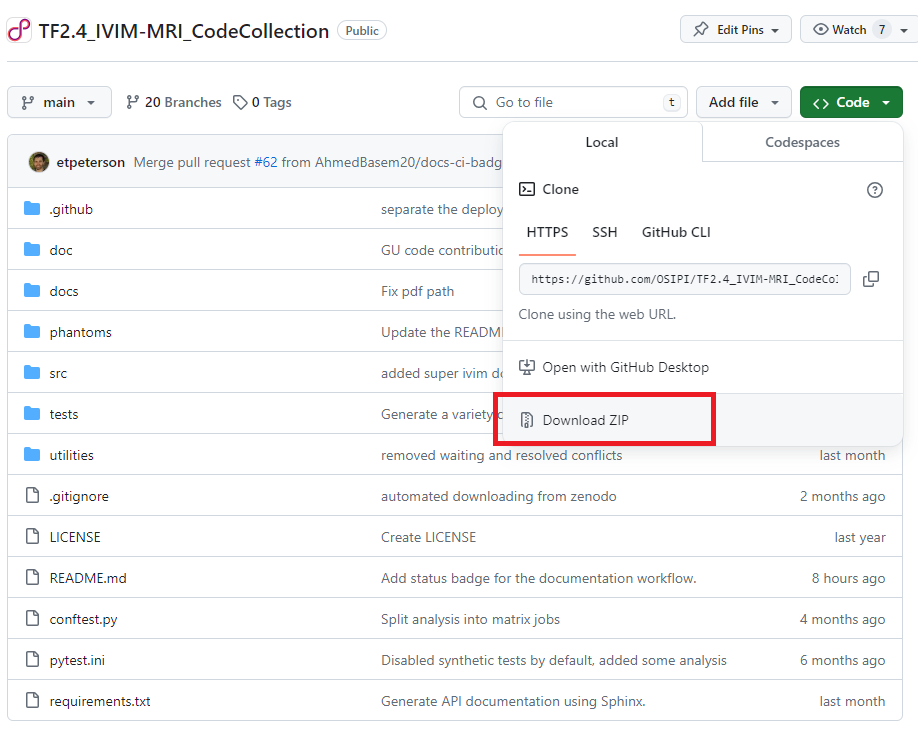

If you haven't done so already, install Anaconda for your pc environment: https://www.anaconda.com/download 

Open Anaconda and install Jupyter Notebook. Once this is installed, you can launch Jupyter Notebook and navigate to this notebook in your local download of the github repository.

## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys
sys.path.insert(0, '..')
from utilities.data_simulation.Download_data import download_data
import nibabel
import os

# Loading Data

Due to the large data size, we stored example data elsewhere: https://zenodo.org/records/10696605


In [2]:
# Download the data. 
download_data()

In [3]:
# Load the data.

# load and init b-values
bvec = np.genfromtxt('../download/Data/brain.bvec')
bval = np.genfromtxt('../download/Data/brain.bval')

#load nifti
data = nibabel.load('../download/Data/brain.nii.gz')
datas = data.get_fdata() 


# Data Preprocessing for one voxel

First, we need to pick a voxel in tissue containing the signal as function of b-values.


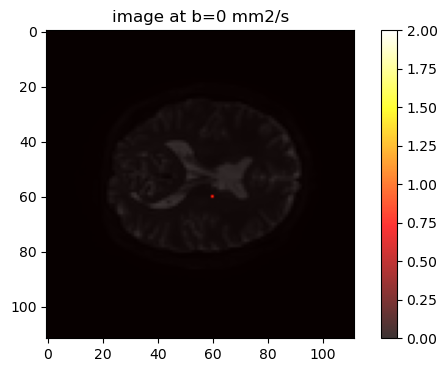

In [175]:
#choose a voxel
x=60
y=60
z=30
sx, sy, sz, n_bval = datas.shape 

#plot example of b=0 image along with the voxel that we chose
voxelmask=np.zeros([sx,sy])
voxelmask[x,y]=1
fig = plt.figure(figsize=(7, 4))
plt.imshow(np.squeeze(datas[:,:,z,0]), cmap='gray')
plt.imshow(np.squeeze(voxelmask), vmin=0, vmax=2, cmap='hot', alpha=.8)
plt.title('image at b=0 mm2/s')
plt.colorbar()

First, we need to normalize the data:

Text(0.5, 1.0, 'normalized signal as function of b-value')

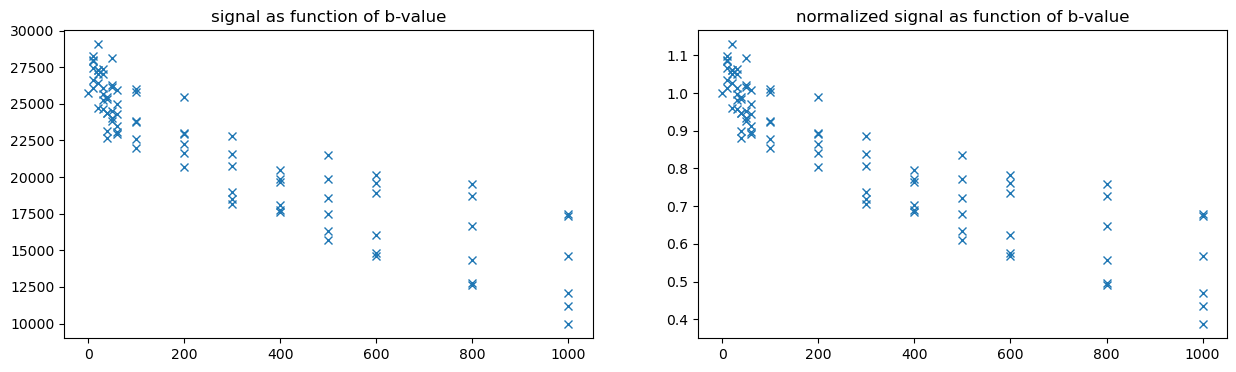

In [180]:
# Plot example signal as function of b-values without normalization
data_vox=np.squeeze(datas[x,y,z,:])
fig = plt.figure(figsize=(15, 4))
plt.subplot(121)
plt.plot(bval,data_vox,'x')
plt.title('signal as function of b-value')

# normalise data
selsb = np.array(bval) == 0
S0 = np.nanmean(data_vox[selsb], axis=0).astype('<f')
data_vox = data_vox / S0


# Plot example signal as function of b-values with normalization
plt.subplot(122)
plt.plot(bval,data_vox,'x')
plt.title('normalized signal as function of b-value')


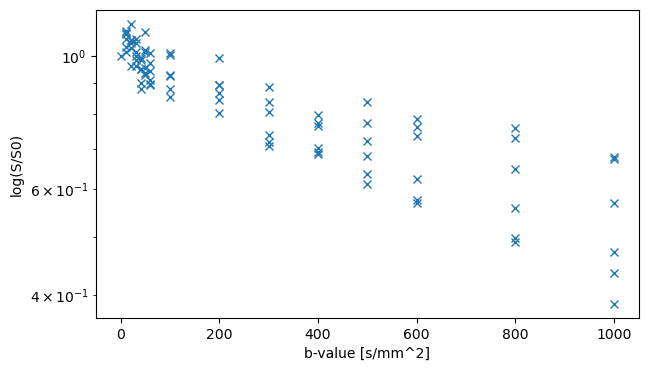

In [182]:
# Plot log(signal) as function of b-values 
fig = plt.figure(figsize=(7, 4))
plt.plot(bval,data_vox,'x')
plt.ylabel('log(S/S0)')
plt.xlabel('b-value [s/mm^2]')
plt.yscale("log")

Text(0.5, 1.0, 'direction 6')

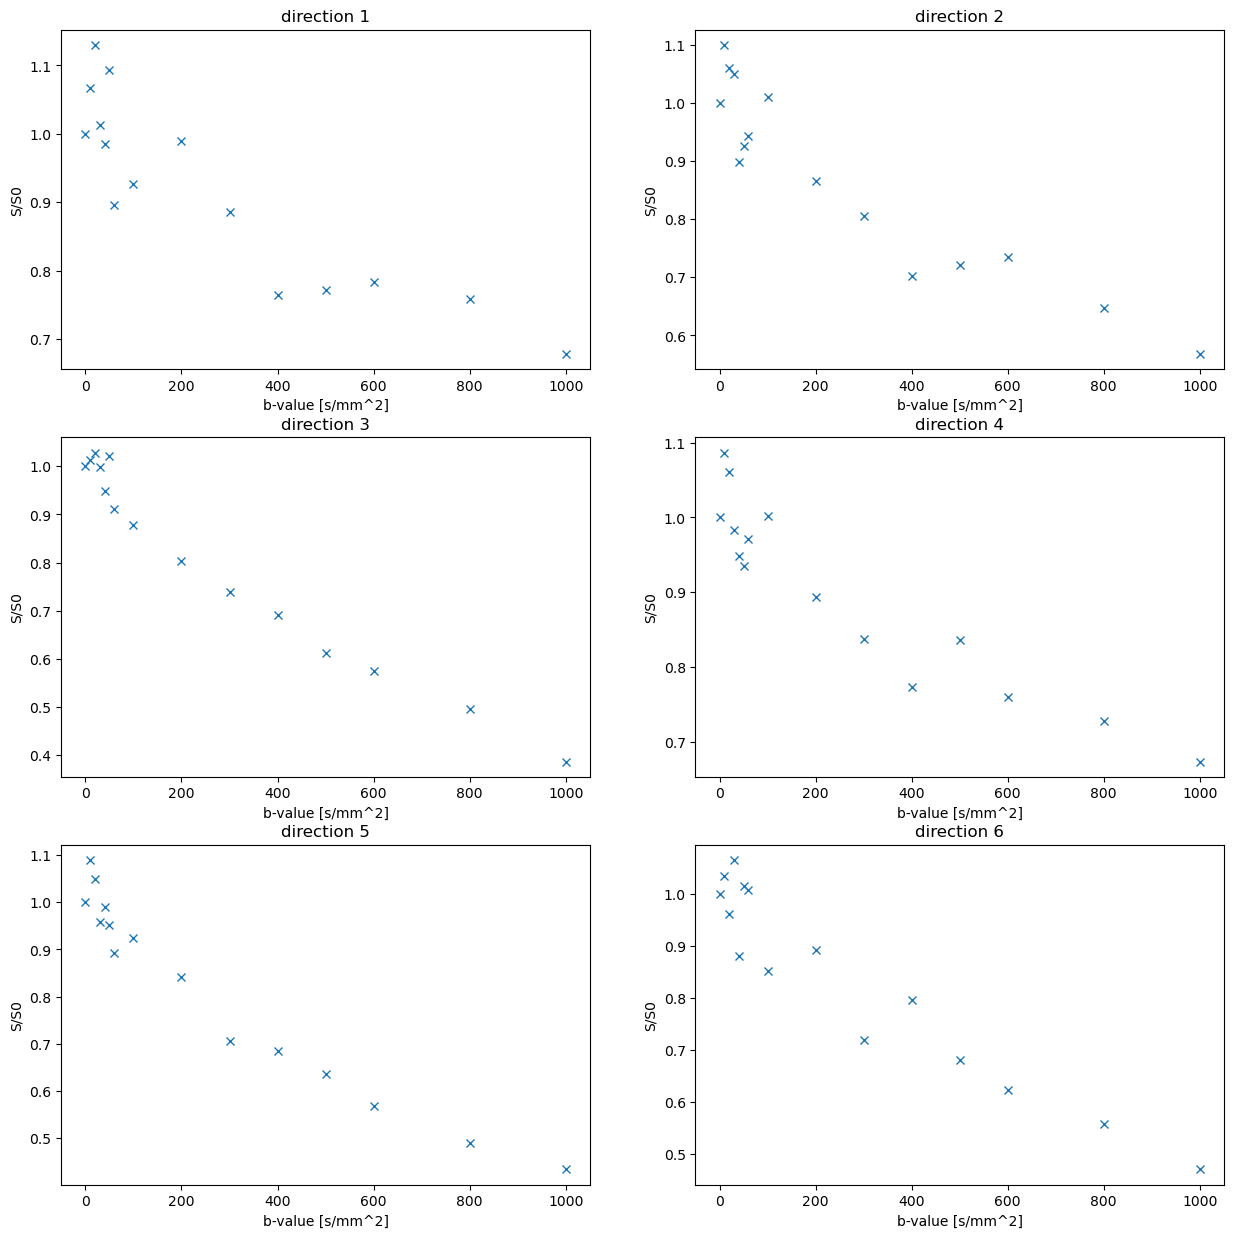

In [188]:
# Plot signal as function of b-values for only 1 direction
fig = plt.figure(figsize=(15, 15))
plt.subplot(321)
direction = 1 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(322)
direction = 2 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(323)
direction = 3 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(324)
direction = 4 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(325)
direction = 5 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

plt.subplot(326)
direction = 6 #choose: 1, 2, 3, 4, 5, or 6
signal_1dir=data_vox[direction:None:6]
signal_1dir=np.insert(signal_1dir, 0, 1)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('direction {}'.format(direction))

# IVIM Analysis: choose an algorithm

Code submissions are located in the src/original folder, where submissions are named as `<initials>_<institution>`
The src/standardized folder contains the standardised version of each code submission. Here, a class is created following a naming convention (`<initials>_<institution>_<algorithm name>`), with `__init__()` and `ivim_fit()` methods that integrate well with the OsipiBase class

## The `OsipiBase` class
The usage of the OsipiBase class mainly consists of running the osipi_fit() method. In this method, the inputs from `__init__()` of the standardised version of a code submission, and the signals and b-values input to `osipi_fit()` is processed and fed into the `ivim_fit()` function.


In [189]:
from src.wrappers.ivim_fit import ivim_fit
from src.wrappers.OsipiBase import OsipiBase




In the folder TF2.4_IVIM-MRI_CodeCollection/src/standardized/ you can see all the algorithms that have been uploaded and standardized. 

In [190]:
currentdir = os.path.dirname(os.getcwd())
os.listdir('{}\\src/standardized'.format(currentdir))


['ETP_SRI_LinearFitting.py',
 'IAR_LU_biexp.py',
 'IAR_LU_modified_mix.py',
 'IAR_LU_modified_topopro.py',
 'IAR_LU_segmented_2step.py',
 'IAR_LU_segmented_3step.py',
 'IAR_LU_subtracted.py',
 'OGC_AmsterdamUMC_Bayesian_biexp.py',
 'OGC_AmsterdamUMC_biexp.py',
 'OGC_AmsterdamUMC_biexp_segmented.py',
 'OJ_GU_seg.py',
 'PvH_KB_NKI_IVIMfit.py',
 'PV_MUMC_biexp.py',
 '__init__.py',
 '__pycache__']

Choose one of these algorithms, for example: 'IAR_LU_biexp' or 'OGC_AmsterdamUMC_Bayesian_biexp', and import it:

In [191]:
from src.standardized.IAR_LU_biexp import IAR_LU_biexp
from src.standardized.OGC_AmsterdamUMC_Bayesian_biexp import OGC_AmsterdamUMC_Bayesian_biexp

In [192]:
algorithm1=IAR_LU_biexp()
algorithm2=OGC_AmsterdamUMC_Bayesian_biexp()

In [193]:
#apply algorithm 1 to the diffusion data in 1 direction to obtain f, D* and D
OsipiBase.osipi_fit(algorithm1,signal_1dir, np.unique(bval))


(0.046097789495925794, 0.011360106117173566, 0.0007113415452953464)

In [194]:
#apply algorithm 2 to the diffusion data in 1 direction to obtain f, D* and D
OsipiBase.osipi_fit(algorithm2,signal_1dir, np.unique(bval)) 

(0.04611801336629449, 0.011354100049251324, 0.0007113015110364574)

You can already see that the different algorithm give slightly different estimates for f, D* and D. Now let's visualize the model fits:

Text(0.5, 1.0, 'algorithm 2')

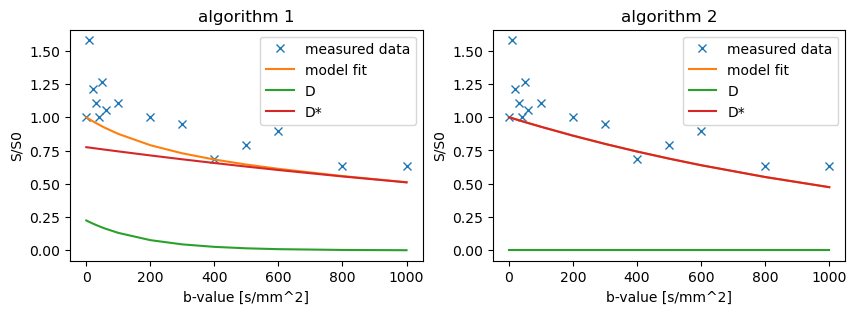

In [118]:
fig = plt.figure(figsize=(10, 3))

#apply algorithm 1 to the diffusion data in 1 direction to obtain f, D* and D
[f, Dstar, D] = OsipiBase.osipi_fit(algorithm1,signal_1dir, np.unique(bval)) #f, D*, D"

#plot the results of algorithm 1
plt.subplot(121)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.plot(np.unique(bval),f*np.exp(-np.unique(bval)*Dstar)+(1-f)*np.exp(-np.unique(bval)*D))
plt.plot(np.unique(bval),f*np.exp(-np.unique(bval)*Dstar))
plt.plot(np.unique(bval),(1-f)*np.exp(-np.unique(bval)*D))
plt.legend(['measured data','model fit','D','D*'])
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('algorithm 1')
          
#apply algorithm 2 to the diffusion data in 1 direction to obtain f, D* and D
[f, Dstar, D] = OsipiBase.osipi_fit(algorithm2,signal_1dir, np.unique(bval)) #f, D*, D"

#plot the results of algorithm 2
plt.subplot(122)
plt.plot(np.unique(bval),signal_1dir,'x')
plt.plot(np.unique(bval),f*np.exp(-np.unique(bval)*Dstar)+(1-f)*np.exp(-np.unique(bval)*D))
plt.plot(np.unique(bval),f*np.exp(-np.unique(bval)*Dstar))
plt.plot(np.unique(bval),(1-f)*np.exp(-np.unique(bval)*D))
plt.legend(['measured data','model fit','D','D*'])
plt.ylabel('S/S0')
plt.xlabel('b-value [s/mm^2]')
plt.title('algorithm 2')


## Perform IVIM model fitting for all voxels in a slice



(229120, 85)

In [160]:
#pick a slice
slice_data=np.squeeze(datas[:,:,30,:])
#reshape data for fitting
sx, sy, n_bval = slice_data.shape 
X_dw = np.reshape(slice_data, (sx * sy, n_bval))
#select only relevant values, delete background and noise, and normalise data
selsb = np.array(bval) == 0
S0 = np.nanmean(X_dw[:, selsb], axis=1)
S0[S0 != S0] = 0
S0=np.squeeze(S0)
valid_id = (S0 > (0.5 * np.median(S0[S0 > 0]))) 
slice_data_norm = X_dw[valid_id, :]

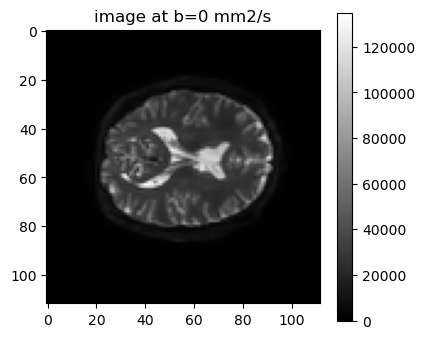

In [161]:
#plot example of b=0 image
fig = plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.imshow(np.squeeze(slice_data[:,:,0]), cmap='gray')
plt.title('image at b=0 mm2/s')
plt.colorbar()

In [162]:
#apply algorithm 1 to the diffusion data to obtain f, D* and D for each voxel in the slice
OsipiBase.osipi_fit(algorithm2,slice_data_norm,bval)

(0.0, 0.0, 0.0)